<a href="https://colab.research.google.com/github/doblepensador/Tests/blob/master/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import multiprocessing
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [2]:
from sklearn.svm import SVR, SVC


In [3]:
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
 



> SVM



In [ ]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123)

# model = make_pipeline(StandardScaler(), SGDRegressor(loss='squared_error'))
# model.fit(X_train, y_train)

model = SVR()
model.fit(X_train, y_train)
print("Score for the train set: {}".format(model.score(X_train, y_train)))
print("Score for the test set: {}".format(model.score(X_test, y_test)))
# Score for the train set: 0.2177283706374875
# Score for the test set: 0.13544178468518187



> SVC



In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123)

model = SVC()
model.fit(X_train, y_train)
print("Score for the train set: {}".format(model.score(X_train, y_train)))
print("Score for the test set: {}".format(model.score(X_test, y_test)))

Score for the train set: 0.9014084507042254
Score for the test set: 0.9230769230769231




> Kernel Function





In [ ]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)
print("Score for the train set: {}".format(linear_svr.score(X_train, y_train)))
print("Score for the test set: {}".format(linear_svr.score(X_test, y_test)))

polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(X_train, y_train)
print("Score for the train set: {}".format(polynomial_svr.score(X_train, y_train)))
print("Score for the test set: {}".format(polynomial_svr.score(X_test, y_test)))

rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)
print("Score for the train set: {}".format(rbf_svr.score(X_train, y_train)))
print("Score for the test set: {}".format(rbf_svr.score(X_test, y_test)))


In [21]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)
print("Score for the train set: {}".format(linear_svc.score(X_train, y_train)))
print("Score for the test set: {}".format(linear_svc.score(X_test, y_test)))

polynomial_svc = SVR(kernel='poly')
polynomial_svc.fit(X_train, y_train)
print("Score for the train set: {}".format(polynomial_svc.score(X_train, y_train)))
print("Score for the test set: {}".format(polynomial_svc.score(X_test, y_test)))

rbf_svc = SVR(kernel='rbf')
rbf_svc.fit(X_train, y_train)
print("Score for the train set: {}".format(rbf_svc.score(X_train, y_train)))
print("Score for the test set: {}".format(rbf_svc.score(X_test, y_test)))

Score for the train set: 0.960093896713615
Score for the test set: 0.986013986013986
Score for the train set: 0.5492121168675772
Score for the test set: 0.3307672139416642
Score for the train set: 0.7141833202421761
Score for the test set: 0.7625209396028003


In [4]:
# # 객체생성
# scaler = StandardScaler()

# # fit -> transform
# scaler.fit(df) # df는 2차원 이상의 값이어야 함
# df_scaled = scaler.transform(df)

# # 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
# df_scaled = pd.DataFrame(data = df_scaled)


# # *** 만약 특정 열의 스케일링을 하고 싶은 경우 ***
# A_n = scaler.fit_transform(df['A'].values.reshape(-1,1))
# df.insert(0, 'A_scaled', A_n)
# df.drop(['A'], axis=1, inplace=True)

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

print("Score for the train set: {}".format(model.score(X_train, y_train)))
print("Score for the test set: {}".format(model.score(X_test, y_test)))

Score for the train set: 0.5204274130135336
Score for the test set: 0.42508654411628244


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


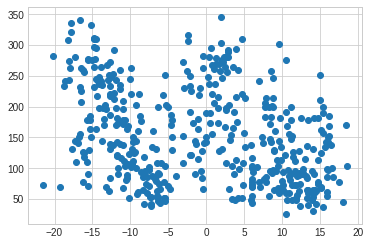

In [6]:
# SVM은 결국 Kernel function으로 차원을 높여서 분류 내지는 회기를 하는 것이기 때문에, 
# t-SNE나 다른 차원을 낮추는 방법을 통해 시각화해야 한다.

# X_comp = TSNE(n_components=1).fit_transform(X)
# plt.scatter(X_comp, y);

t_SNE = TSNE(n_components=1)
X_comp = t_SNE.fit_transform(X)
plt.scatter(X_comp, y);

In [ ]:
X_comp

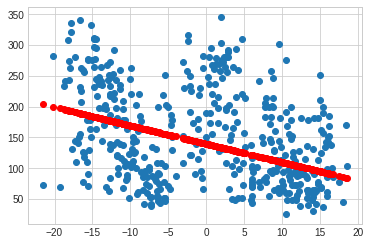

In [8]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [41]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(estimator=estimator, X=X, y=y, cv=5,
               n_jobs=multiprocessing.cpu_count(),
               verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.3s finished


{'fit_time': array([0.01693988, 0.02622652, 0.01127958, 0.04718685, 0.01315403]),
 'score_time': array([0.00260878, 0.00266504, 0.00249004, 0.00256729, 0.00259972]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [59]:
# 가장 좋은 모델을 찾아서 그 모델에 맞춰서 정리하면 됨. 
# param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
#          'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],
#          'gamma' : ('auto','scale')}

param = {
         'C' : [1,5,10],
         'gamma' : ('auto','scale')}

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

model = SVR()

gs = GridSearchCV(
    estimator = model,
    param_grid = param,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=2,
             param_grid={'C': [1, 5, 10], 'gamma': ('auto', 'scale')},
             verbose=True)

In [60]:
gs.best_estimator_

SVR(C=10, gamma='auto')

In [10]:
# SVC 에 대한 정리 
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print("Score for the train set: {}".format(model.score(X_train, y_train)))
print("Score for the test set: {}".format(model.score(X_test, y_test)))

Score for the train set: 0.9912087912087912
Score for the test set: 0.956140350877193


In [13]:
def make_meshgrid(x, y, h= 0.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  return xx, yy

In [14]:
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.column_stack([xx.ravel(), yy.ravel()]))
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)
  return out

In [15]:
t_SNE = TSNE(n_components=2)
X_comp = t_SNE.fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


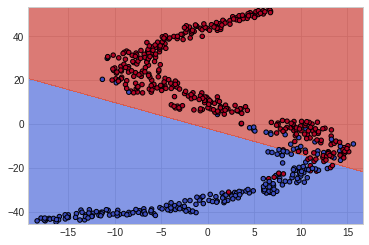

In [16]:
model.fit(X_comp, y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [17]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(estimator=estimator, X=X, y=y, cv=5,
               n_jobs=multiprocessing.cpu_count(),
               verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.6s finished


{'fit_time': array([0.02950978, 0.00725627, 0.00718808, 0.00678706, 0.00994015]),
 'score_time': array([0.00150704, 0.00136399, 0.00120354, 0.0010972 , 0.00420141]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [20]:
# 가장 좋은 모델을 찾아서 그 모델에 맞춰서 정리하면 됨. 
# param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
#          'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],
#          'gamma' : ('auto','scale')}

param = {'C' : [1.0,0.1,0.01],
         'gamma' : ('auto','scale')}

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

model = SVC()

gs = GridSearchCV(
    estimator = model,
    param_grid = param,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X, y)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=2,
             param_grid={'C': [1.0, 0.1, 0.01], 'gamma': ('auto', 'scale')},
             verbose=True)

In [21]:
gs.best_estimator_

SVC(gamma='auto')